In [1]:
#import

import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk', font_scale=1)

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
from network_control.energies import minimum_energy, optimal_energy, sim_state_eq
from network_control.utils import matrix_normalization
from network_control.plotting import set_plotting_params, reg_plot
set_plotting_params()

In [2]:
# load data
A = np.load('/Users/stiso/Downloads/Archive/A.npy')
A = matrix_normalization(A[:, :, 0])
n = np.shape(A)[0]

## Minimum Energy

In [3]:
B = np.eye(n)
S = np.eye(n)
x0 = np.random.rand(n,1)
xf = np.random.rand(n,1)
T = 5
rho=1
m_x, m_u, n_err = minimum_energy(A,T,B,x0,xf)
n_err

8.549379957866754e-13

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


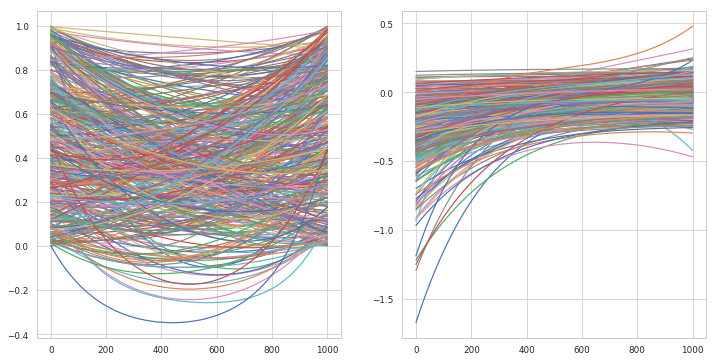

In [4]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(m_x)
ax[1].plot(m_u)
plt.show()

## Optimal Energy

In [5]:
o_x, o_u, n_err = optimal_energy(A,T,B,x0,xf,rho,S)
n_err

2.731999629905013e-12

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


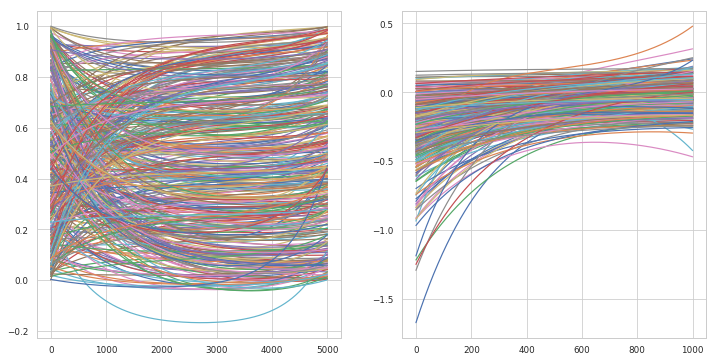

In [6]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(o_x)
ax[1].plot(m_u)
plt.show()

### Minimum vs Optimal Energy

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


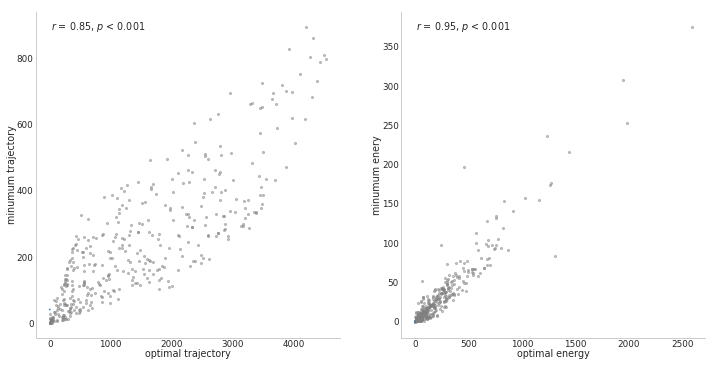

In [7]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
reg_plot(x=np.sum(o_x**2,0), y=np.sum(m_x**2,0), xlabel='optimal trajectory', ylabel='minumum trajectory', ax=ax[0])
reg_plot(x=np.sum(o_u**2,0), y=np.sum(m_u**2,0), xlabel='optimal energy', ylabel='minumum enery', ax=ax[1])
plt.show()

## Simulate State Equation

In [8]:
U = np.random.rand(n,100)
x = sim_state_eq( A, B, x0, U)

(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(400, 1)
(400,)
(

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


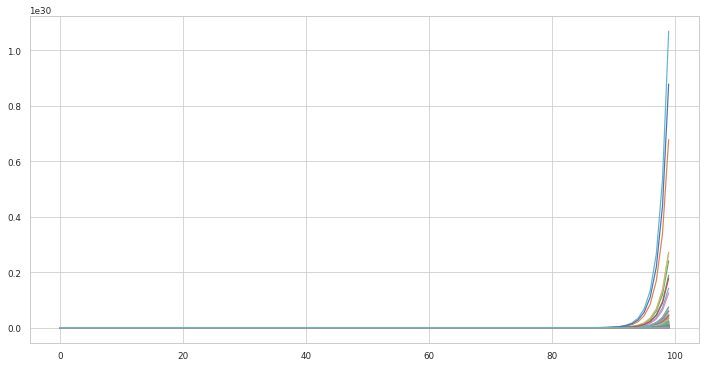

In [9]:
fig,ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(np.squeeze(x.T))
plt.show()

In [10]:
import numpy as np
np.random.seed(28)
A = np.random.rand(5,5)
A

array([[0.72901374, 0.5612396 , 0.12496709, 0.39759237, 0.78130821],
       [0.51099298, 0.18269336, 0.85351288, 0.95537189, 0.98421347],
       [0.19270097, 0.9707951 , 0.23480835, 0.02635385, 0.94606034],
       [0.92172485, 0.29397577, 0.1662737 , 0.39542284, 0.51066973],
       [0.30803723, 0.42956883, 0.83006941, 0.56239357, 0.83088831]])

In [11]:
A = matrix_normalization(A, c=1)
A

array([[0.18918473, 0.14564604, 0.03242993, 0.10317831, 0.20275555],
       [0.13260665, 0.04741035, 0.22149322, 0.24792643, 0.25541104],
       [0.0500074 , 0.25192887, 0.06093459, 0.00683903, 0.24551001],
       [0.23919476, 0.076289  , 0.04314932, 0.1026153 , 0.13252276],
       [0.07993805, 0.11147645, 0.21540946, 0.1459455 , 0.21562197]])

In [12]:
U = np.zeros((5,100)) # the input to the system
U[:,:,0] # impulse, 1 energy at the first time point
B = np.eye(5)
x0 = np.ones((5,1))
x = sim_state_eq( A, B, x0, U)
fig,ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(np.squeeze(x.T))
plt.show()

IndexError: too many indices for array

In [ ]:
A_unstable = np.random.rand(5,5)
x = sim_state_eq( A_unstable, B, x0, U)
fig,ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(np.squeeze(x.T))
plt.show()

In [ ]:
np.matmul(A,np.squeeze(x0))
